# Evaluation terminale : Machine learning & python -- Chatelain Lucas

Cet examen se compose de 3 parties : 
<ol>
  <li>Restitution théorique</li>
  <li>Restitution pratique</li>
  <li>Cas pratique</li>
</ol>

## Partie 1 : Restitution théorique

Pour cette partie, l'objectif est de décrire des notions théoriques. Essayez de rédiger des réponses claires en utilisant vos mots.

#### Question 1.1: Donner une définition du machine learning. Eviter de recopier de wikipédia, essayer d'en donner une description en quelques mots.

Réponse : Le machine learning permet de completer les données d'une base de donnée en se basant sur les données déja existante.

#### Question 1.2: Donner quelques applications concrètes d'utilisation du machine learning.

Réponse : Reconnaissance d'image

#### Question 1.3: Quelles sont les 2 principales familles "d'apprentissage"? Donner une rapide définition de chacune

Réponse : 
Arbre de décision : Créer un arbre séparant les données.
Classification binaire : Classer les données selon des regles précises

#### Question 1.4: Dans laquelle de ces familles appartient la "classification"? Le "clustering"?

Réponse : Classification binaire

#### Question 1.5: Définissez ce qu'est un arbre de décision et décrivez  de manière simple sa construction.

Réponse : Un arbre de décision permet de diviser les données en plusieurs groupes. Un arbre est constitué d'intersection divisant les données en deux selon un critère.

#### Question 1.6: Dans quelle situation parle-t-on "d'overfitting"?

Réponse : Quand le système n'est pas capable de traiter des données autres que celle déjà présente dans la base de donnée.

## Partie 2 : Etude d'un cas pratique

Pour cette partie, vous devrez vous inspirer des TP réalisés en cours. 

Il vous faut importer les librairies qui vous seront nécessaires répondre à la problèmatique dans la cellule suivante :

In [94]:
# importing packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# importing packages
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc

from sklearn.model_selection import GridSearchCV, cross_val_score

Importez les données comme suit :

In [95]:
data = pd.read_csv('nba_logreg.csv')

Ce jeu de données décrit les caracteristiques de jeu de joueurs de Basketball au sein de la NBA. La variable d'intérêt Y est "TARGET_5yrs". La description de ce dataset se trouve dans le fichier "NBA_variables_doc.png"

__L'objectif du problème est de réussir à prédire si un jeune joueur durera plus ou moins que 5ans au sein de la ligue.__

In [63]:
data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.1: Donnez au moins une colonne qui doit être enlevé du jeu de données. Pourquoi? 

Réponse : GP car le nombre de match joué dépend du nombre d'année dans la NBA

#### Exercice 2.1: Enlevez les variables du dataset qui vous semble inutile au problème.

In [96]:
data = data.drop(labels=['GP', 'Name'], axis=1)

#### Question 2.2: Ce dataset contient - il des données manquantes ou non exploitable?

Réponse : Oui.

#### Exercice 2.2: Si oui, donnez en la proportion par colonne.

In [97]:
for col in data.columns:
    v = col + " : " + str(data[col].isnull().sum()/len(data))
    print(v)
data.dropna(inplace=True)

MIN : 0.0
PTS : 0.0
FGM : 0.0
FGA : 0.0
FG% : 0.0
3P Made : 0.0
3PA : 0.0
3P% : 0.008208955223880597
FTM : 0.0
FTA : 0.0
FT% : 0.0
OREB : 0.0
DREB : 0.0
REB : 0.0
AST : 0.0
STL : 0.0
BLK : 0.0
TOV : 0.0
TARGET_5Yrs : 0.0


#### Exercice 2.3: Séparez les données en 2 échantillons train-test

In [98]:
# model variables definitions
Y = data['TARGET_5Yrs']
X = data.drop(labels=['TARGET_5Yrs'], axis=1)

# splitting into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)
X_train

,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
287,18.2,6.9,2.6,6.3,40.8,0.3,1.0,32.9,1.4,1.7,83.3,0.5,1.3,1.7,3.0,0.6,0.1,1.6
1292,15.0,4.8,1.9,4.6,41.9,0.0,0.1,33.3,0.9,1.4,65.7,0.9,1.7,2.6,1.2,0.7,0.3,0.9
1117,8.5,2.1,0.6,2.1,29.4,0.3,1.0,26.1,0.6,0.8,75.0,0.1,0.8,0.9,0.8,0.2,0.0,0.5
294,14.2,4.4,1.5,3.1,47.1,0.0,0.0,0.0,1.4,2.1,69.3,1.1,1.9,2.9,0.8,0.6,0.2,0.7
921,36.5,21.0,7.6,17.9,42.6,0.8,2.6,32.2,5.0,6.4,77.7,2.2,3.8,6.1,2.8,1.2,0.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,13.8,5.6,2.2,4.4,50.0,0.2,0.5,38.9,1.0,1.4,71.4,0.7,1.3,1.9,0.5,0.2,0.1,0.5
1141,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7
1305,6.2,2.6,1.0,2.4,41.5,0.0,0.0,0.0,0.6,1.0,63.0,1.1,1.6,2.6,0.2,0.2,0.5,0.5
871,16.9,5.1,2.0,3.4,59.6,0.0,0.0,0.0,1.1,1.8,57.7,1.6,2.9,4.5,0.6,0.5,0.3,0.8


#### Question 2.3: Pourquoi cette étape est-elle indispensable?

Réponse : Pour mettre a l'ecart la colonne a deviner

#### Exercice 2.4: Entrainez sur ces données un arbre de décision. Calculer une prédiction.

In [99]:
# calling decisiontree classifier
clf = DecisionTreeClassifier()
# fitting on data
clf = clf.fit(X_train, Y_train)

estimate = clf.predict_proba(X_test)[:,1]
print(estimate)

[1.  1.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.
 1.  0.  0.  1.  0.  0.  0.  0.  1.  1.  1.  0.  1.  1.  1.  0.  0.  0.
 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  1.  1.  1.  0.
 0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.  1.  1.  0.  0.  0.  0.
 0.  1.  0.  1.  0.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 0.  1.  1.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.
 0.  0.  1.  0.5 0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  0.
 0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  1.  1.  0.
 1.  1.  1.  1.  0.  0.5 1.  1.  1.  1.  0.  1.  0.  0.  0.  1.  1.  0.
 1.  1.  1.  1.  0.  1.  0.  0.  0.  1.  0.  1.  1.  1.  0.  1.  1.  1.
 1.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  1.  1.
 1.  0.  1.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
 0.  1.  0.  0.  0.  1.  1.  0.  1.  1.  0.5 1.  1.  0.  1.  0.  1.  0.
 1.  0.  1.  0.  0.5 0.  0.  0.  0.  0.5 1.  0.  1.  0.  0.  1. 

#### Exercice 2.5: Evaluez la qualité du modèle. 

In [100]:
# average diffence estimation true values
print(abs(Y_test - estimate).mean())
print((Y_test - estimate).std())

0.4099099099099099
0.6316369450012653


#### Question 2.4: Quelle métrique utilisez vous? Pourquoi? 

Réponse : La différence moyenne entre le résultat voulue et le résultat obtenue.

#### Question 2.5: Le modèle construit est-il de qualité satisfaisante? Expliquez.

Réponse : Non. Les résultats obtenues sont trops éloigné des résultats attendues

#### Exercice 2.6: Produisez une visualisation graphique de l'arbre construit

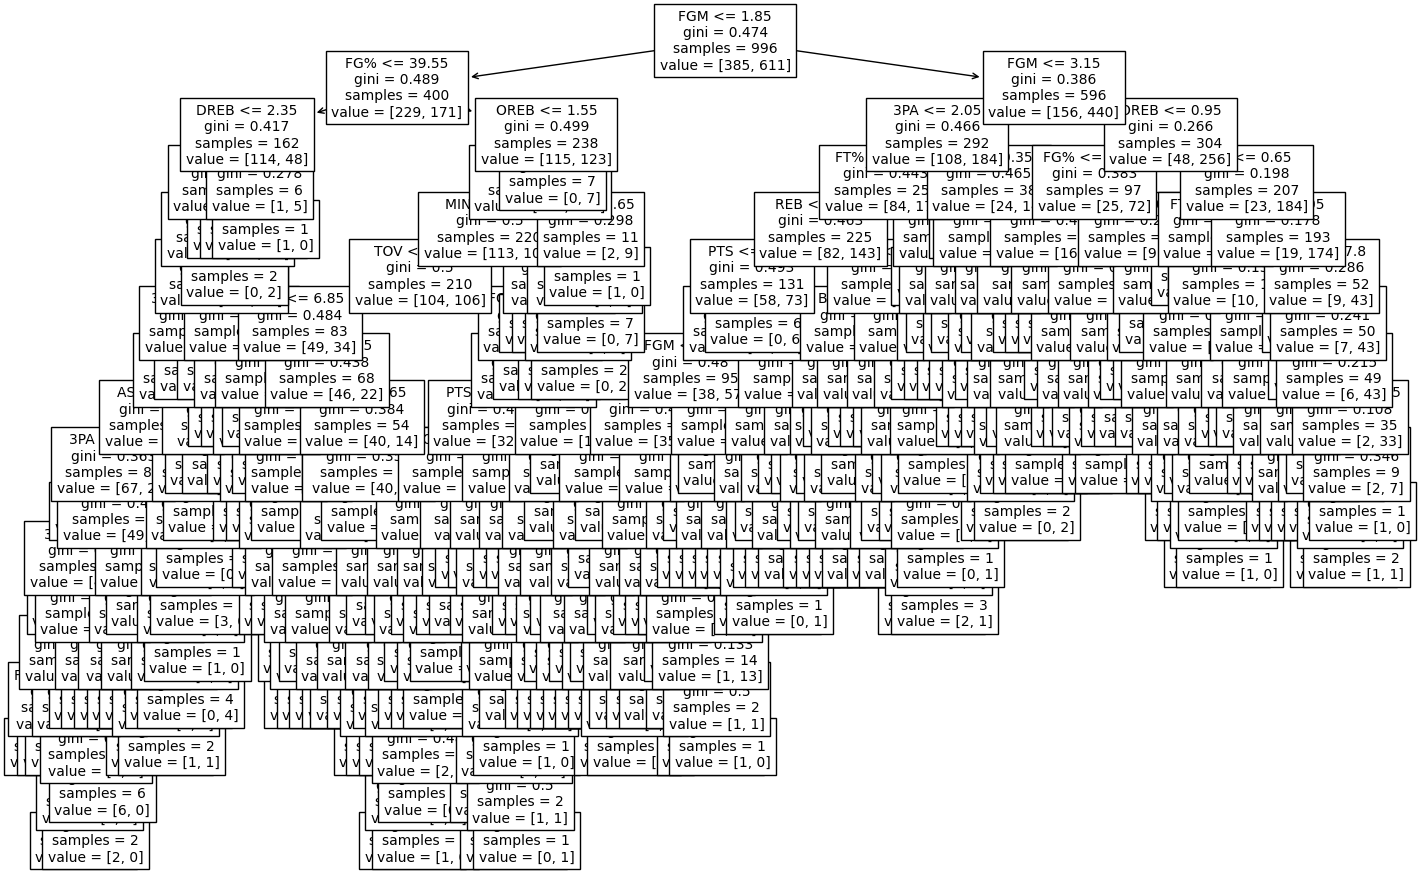

In [101]:
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.6: Donnez un exemple de lecture d'un tel arbre.

Réponse : La première intersection séparre les colonnes entre ce ayant FGM <= 1.85 et ce ayant FGM > 1.85

#### Question 2.7: Comment peut - on améliorer la qualité du modèle? Donnez au moins 3 méthodes:

Réponse :
1) Hyperparameter
2) Features importance
3) Grid search

#### Exercice 2.7: Essayer d'appliquer une de ces méthodes

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
546 fits failed out of a total of 1092.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
546 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-pack

best parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 0.15, 'random_state': 42}
best auc: 0.7055871007589795


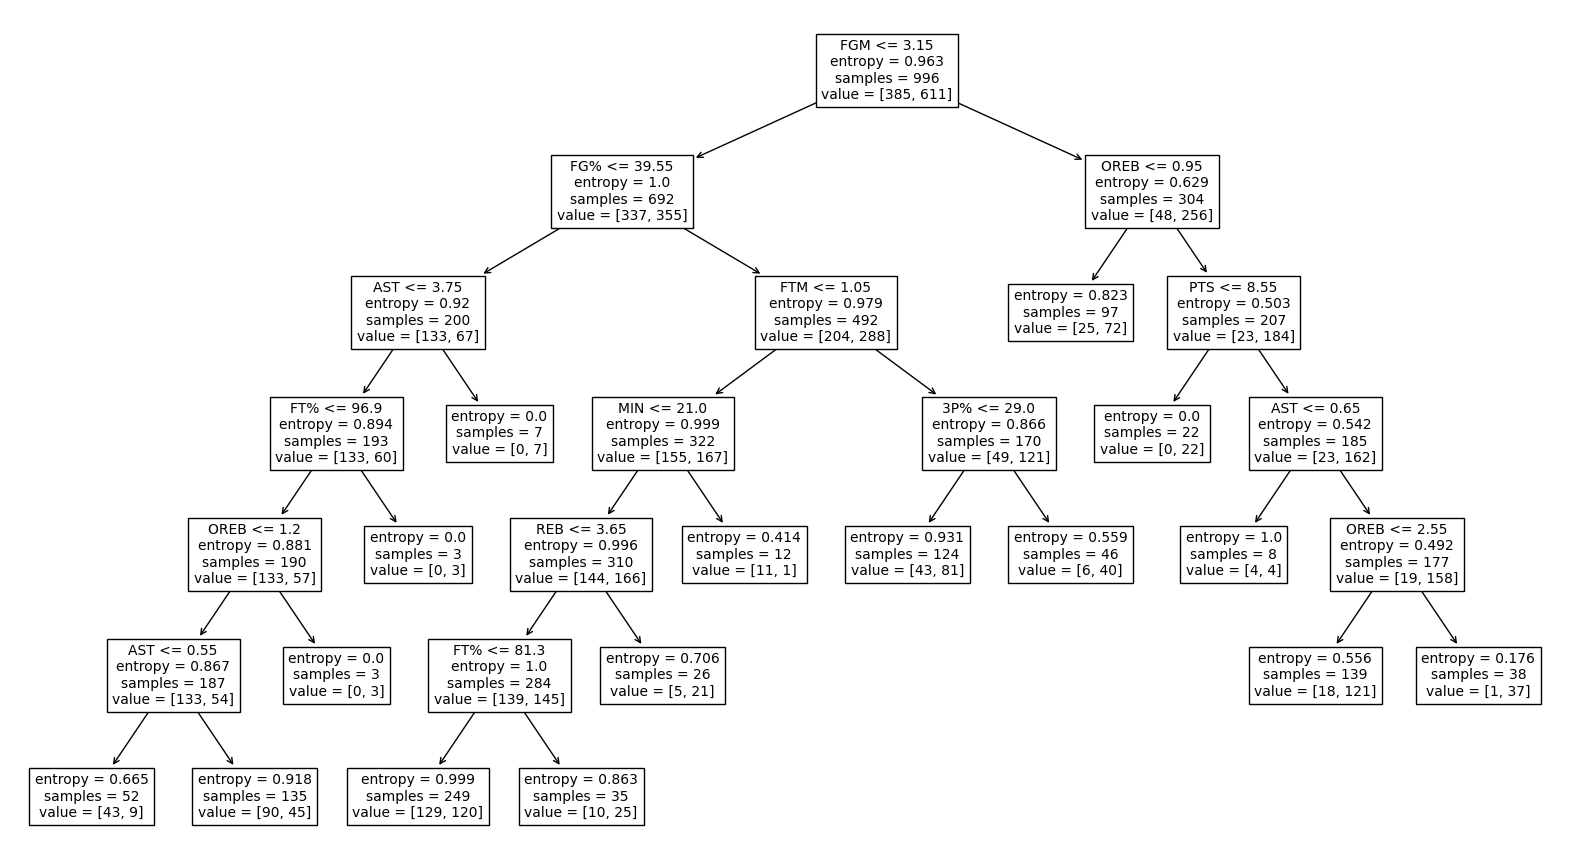

In [89]:
param_space = {'criterion':[ 'entropy', 'Gini'], 
               'max_depth': list(range(2,15,1)),
               'min_samples_split':[0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
               'random_state': [42]}
clf_grid = DecisionTreeClassifier()
grid_search_tree = GridSearchCV(estimator=clf_grid,
                                param_grid=param_space,
                                scoring='roc_auc',
                                cv=7)

# running search
grid_search_tree.fit(X, Y.values)
best_parameters = grid_search_tree.best_params_
best_auc = grid_search_tree.best_score_
print('best parameters: ' + str(best_parameters))
print('best auc: ' + str(best_auc))
clf_grid.set_params(** best_parameters)
clf_grid.fit(X_train, Y_train)
plt.figure(figsize=(20,11))
plot_tree(clf_grid, feature_names = list(X.columns), fontsize=10)
plt.show()

#### Question 2.8: Concluez

Réponse : L'arbre est plus lisible. 
le modèle est plus juste.